Temperature Clusters:
Cluster 1: [13, 14, 15, 16]
Cluster 2: [33, 34, 35, 36]
Cluster 3: [23, 24, 25, 26]


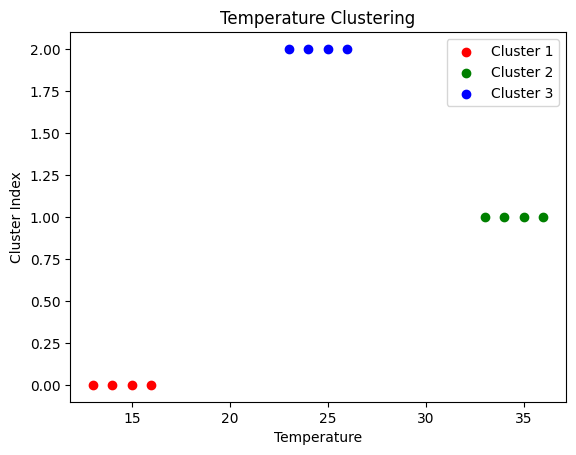

Humidity Clusters:
Cluster 1: [20, 21, 22, 23]
Cluster 2: [85, 86, 87, 88]
Cluster 3: [53, 54, 55, 56]


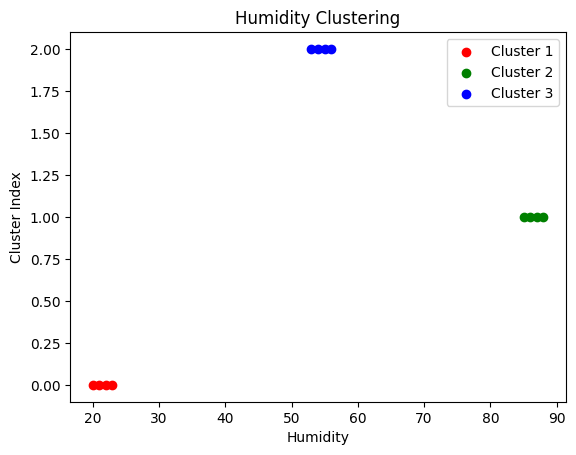

Pressure Clusters:
Cluster 1: [943, 944, 945, 946]
Cluster 2: [1144, 1145, 1146, 1147]
Cluster 3: [1043, 1044, 1045, 1046]


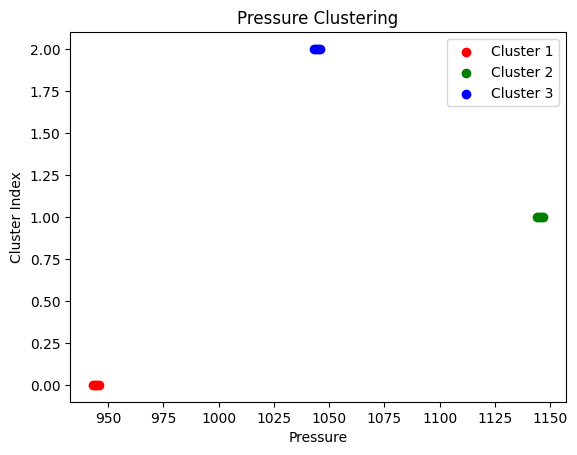

Wind Speed Clusters:
Cluster 1: [4, 5, 5, 6]
Cluster 2: [18, 19, 19, 20]
Cluster 3: [12, 13, 13, 14]


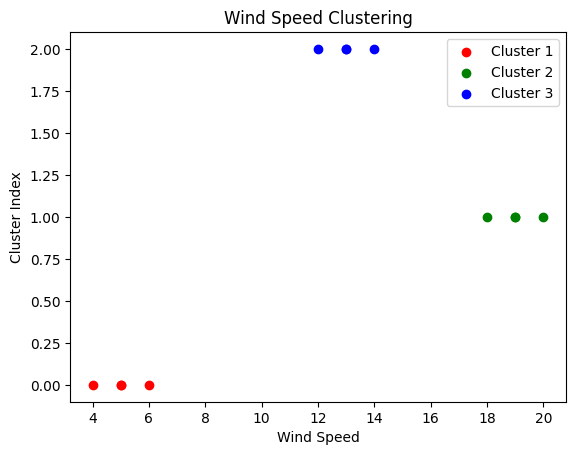

In [21]:
import pandas as pd
import math
import matplotlib.pyplot as plt

def distance(temp1, temp2):
    """Calculates the distance between two temperature values."""
    return abs(temp1 - temp2)

def find_kmin(dataset):
    """Finds the minimum value in the dataset."""
    return min(dataset)

def find_kmax(dataset, kmin):
    """Finds the value farthest from kmin."""
    return max(dataset, key=lambda temp: distance(temp, kmin))

def find_s(dataset, kmin, kmax):
    """Finds the value farthest from both kmin and kmax."""
    return max(dataset, key=lambda temp: max(distance(temp, kmin), distance(temp, kmax)))

def correct_s(kmin, kmax, s, kstrprv, k):
    """Corrects S based on its distances to kmin and kmax."""
    d_kmin_s = distance(kmin, s)
    d_kmax_s = distance(kmax, s)

    if d_kmin_s == d_kmax_s:
        return s
    elif d_kmin_s < d_kmax_s:  # S is closer to kmin
        xm = distance(kmax, kstrprv) / (k - 1)
        return kstrprv + xm  
    else:  # S is closer to kmax
        xm = distance(kstrprv, kmin) / (k - 1) 
        return kmin + xm 

def cluster_temperature_column(temperatures, k):
    """Clusters the temperatures into k clusters."""
    kmin = find_kmin(temperatures)
    kmax = find_kmax(temperatures, kmin)
    strange_points = [kmin, kmax]
    kstrprv = kmin

    for _ in range(k - 2):
        s = find_s(temperatures, strange_points[-2], strange_points[-1])
        kstr = correct_s(strange_points[-2], strange_points[-1], s, kstrprv, k)
        strange_points.append(kstr)
        kstrprv = kstr

    clusters = [[] for _ in range(k)]
    for temp in temperatures: 
        min_distance = float('inf')
        closest_cluster = None
        for i, strange_point in enumerate(strange_points):
            current_distance = distance(temp, strange_point)
            if current_distance < min_distance:
                min_distance = current_distance
                closest_cluster = i
        clusters[closest_cluster].append(temp)

    return clusters

# -------- Main Execution --------
# Read the CSV file
data = pd.read_csv('weather_data.csv')

# ------ Clustering and Visualization for Temperature ------
temperatures = data['temperature'].tolist()
num_clusters = 3  
clusters_temp = cluster_temperature_column(temperatures, num_clusters)

# Print temperature clusters
print("Temperature Clusters:")
for i, cluster in enumerate(clusters_temp):
    print(f"Cluster {i+1}: {cluster}") 

# Visualization for temperature
colors = ['red', 'green', 'blue'] 
for i, cluster in enumerate(clusters_temp):
    plt.scatter(cluster, [i] * len(cluster), color=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Temperature')
plt.ylabel('Cluster Index') 
plt.title('Temperature Clustering')
plt.legend()
plt.show()

# ------ Clustering and Visualization for Humidity ------
humidity = data['humidity'].tolist()
clusters_hum = cluster_temperature_column(humidity, num_clusters) 

# Print humidity clusters
print("Humidity Clusters:")
for i, cluster in enumerate(clusters_hum):
    print(f"Cluster {i+1}: {cluster}") 

# Visualization for humidity
for i, cluster in enumerate(clusters_hum):
    plt.scatter(cluster, [i] * len(cluster), color=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Humidity')
plt.ylabel('Cluster Index') 
plt.title('Humidity Clustering')
plt.legend()
plt.show()

# ------ Pressure ------
pressure = data['pressure'].tolist()
clusters_pressure = cluster_temperature_column(pressure, num_clusters)

print("Pressure Clusters:")
for i, cluster in enumerate(clusters_pressure):
    print(f"Cluster {i+1}: {cluster}") 

# Visualization 
for i, cluster in enumerate(clusters_pressure):
    plt.scatter(cluster, [i] * len(cluster), color=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Pressure')
plt.ylabel('Cluster Index') 
plt.title('Pressure Clustering')
plt.legend()
plt.show()

# ------ Wind Speed ------
windspeed = data['windspeed'].tolist()
clusters_wind = cluster_temperature_column(windspeed, num_clusters)

print("Wind Speed Clusters:")
for i, cluster in enumerate(clusters_wind):
    print(f"Cluster {i+1}: {cluster}") 

# Visualization 
for i, cluster in enumerate(clusters_wind):
    plt.scatter(cluster, [i] * len(cluster), color=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Wind Speed')
plt.ylabel('Cluster Index') 
plt.title('Wind Speed Clustering')
plt.legend()
plt.show()
